# Data preparation

Import library

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import random

%matplotlib inline
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv('winequality-red.csv')
df = df.copy()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## handling missing values

In [4]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## handling duplicates

In [5]:
df.duplicated().sum()

240

In [6]:
df = df.drop_duplicates()

In [7]:
columns = {'fixed acidity',
           'volatile acidity',
           'citric acid',
           'residual sugar',
           'chlorides',
           'free sulfur dioxide',
           'total sulfur dioxide',
           'density',
           'pH',
           'sulphates',
           'alcohol',
           'quality'}

## histogram

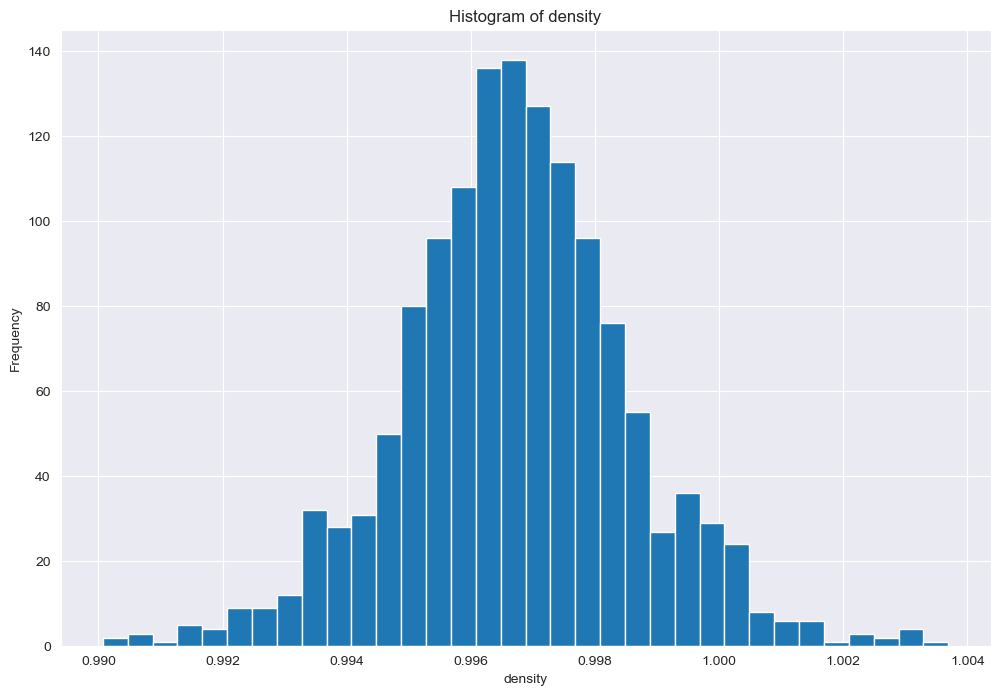

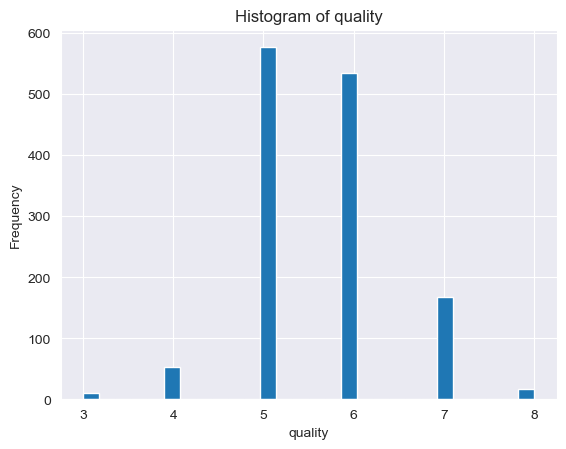

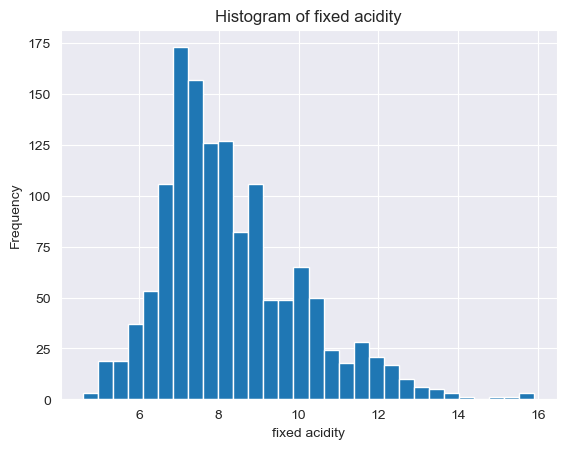

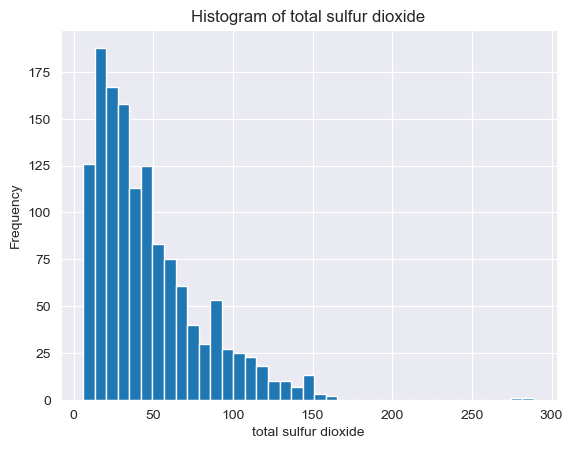

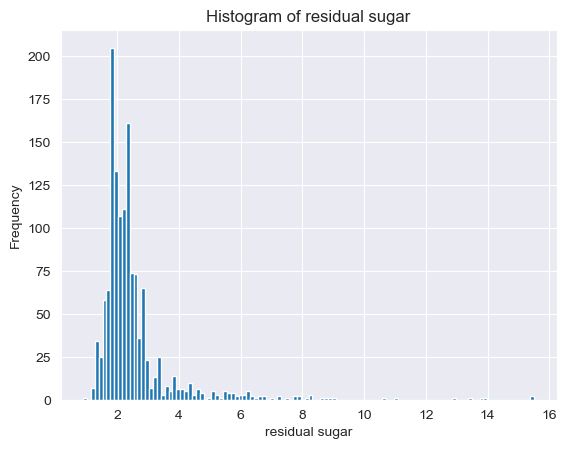

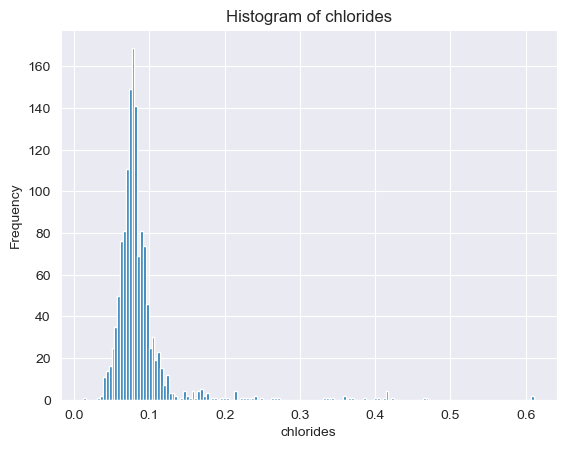

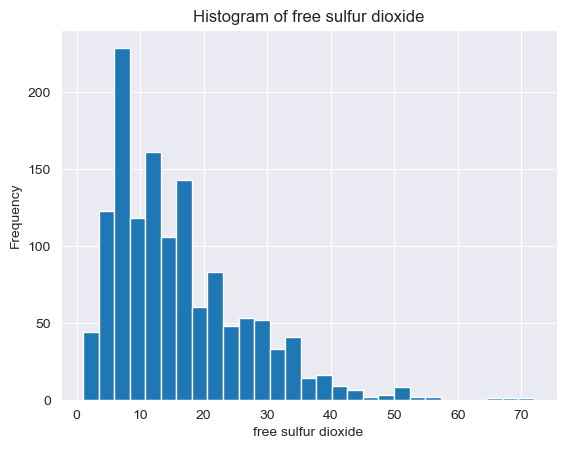

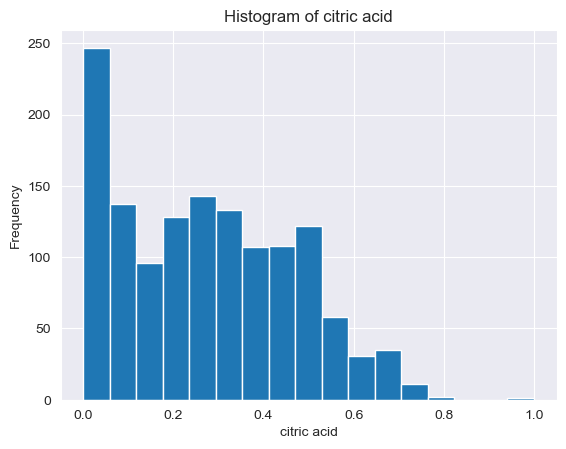

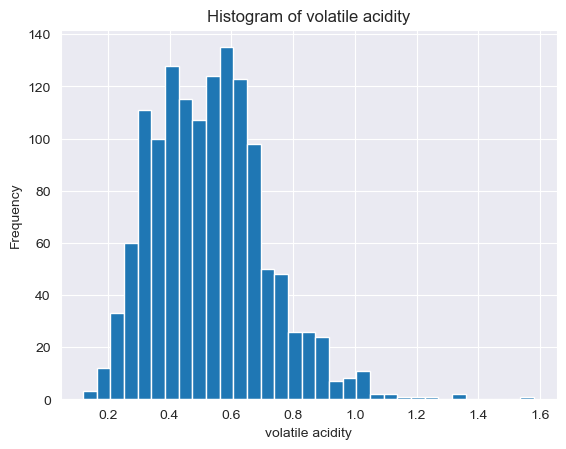

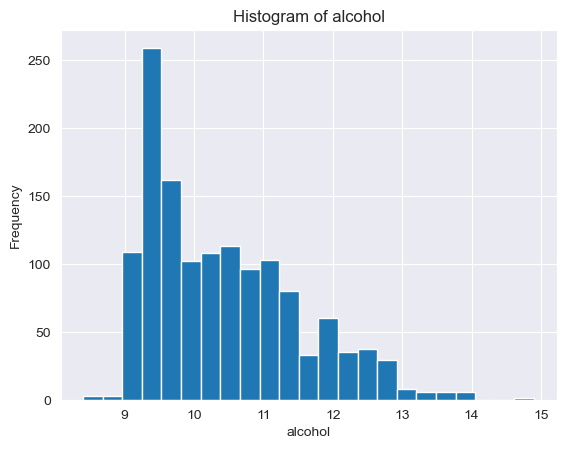

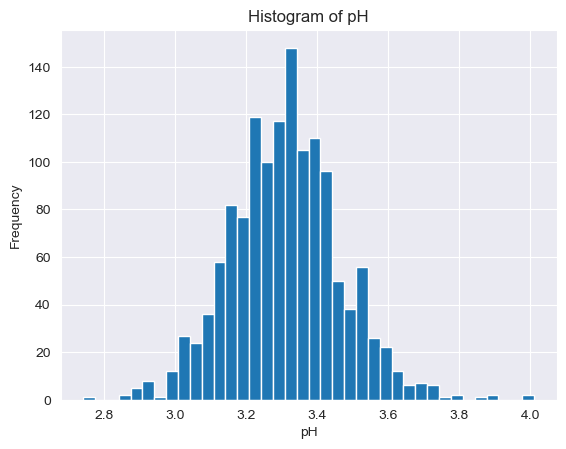

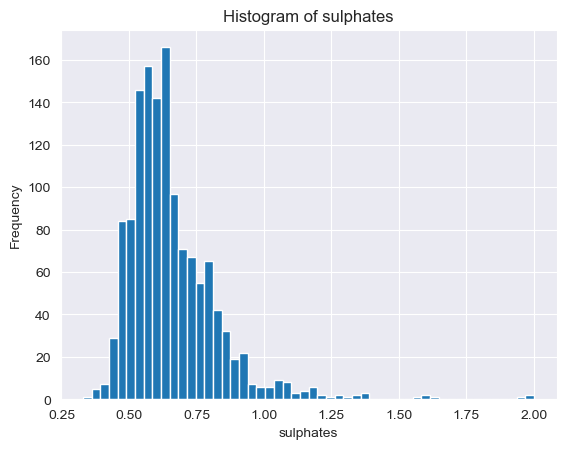

In [8]:
# Mengatur ukuran dan layout subplot
plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.5)  # Menambahkan ruang horizontal antar subplot

# Iterasi melalui setiap kolom dan membuat boxplot di subplot terpisah
for i, name in enumerate(columns, 1):
#     plt.subplot(2, len(columns)//2, i)  # 2 baris, sejumlah kolom//2 kolom
    plt.hist(df[name], bins = 'auto')
    plt.xlabel(f"{name}")
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {name}")
    plt.show()

<Axes: xlabel='quality', ylabel='count'>

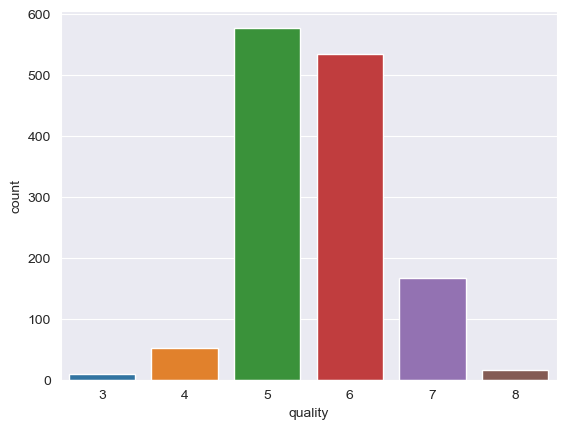

In [9]:
sns.countplot(data=df, x='quality')

## cek korelasi

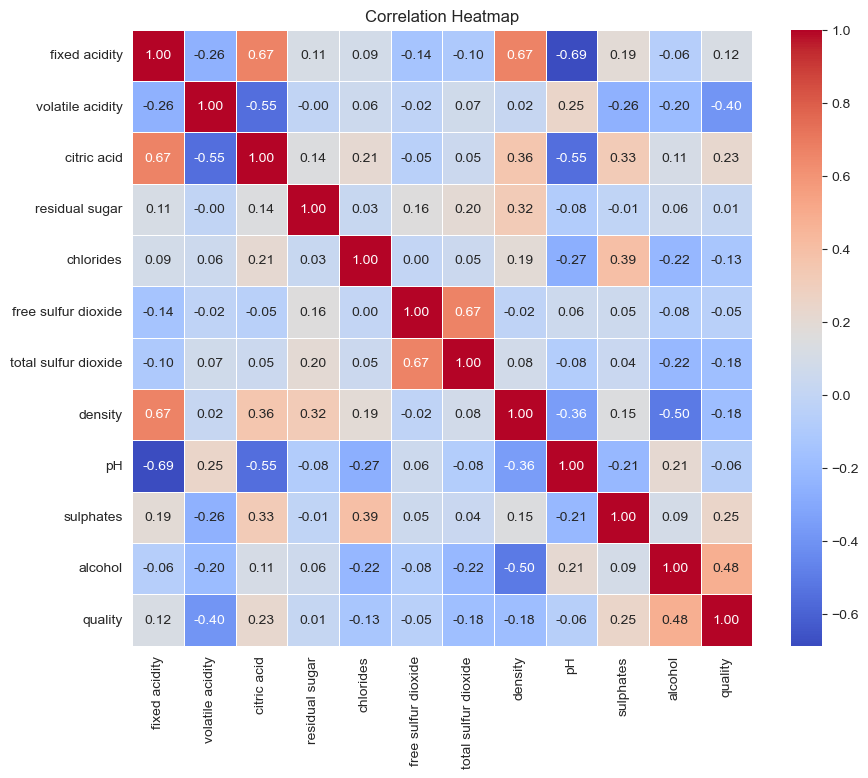

In [10]:
# Membuat heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Menambahkan judul
plt.title("Correlation Heatmap")

# Menampilkan plot
plt.show()

- Alkohol berkorelasi positif dengan kualitas anggur merah.
- Alkohol memiliki korelasi positif yang lemah dengan nilai pH.
- Citric acid dan kepadatannya memiliki korelasi positif yang kuat dengan fixed acidity.
- pH memiliki korelasi negatif dengan density, fixed acidity, citric acid, dan sulfates.

# cek outliers

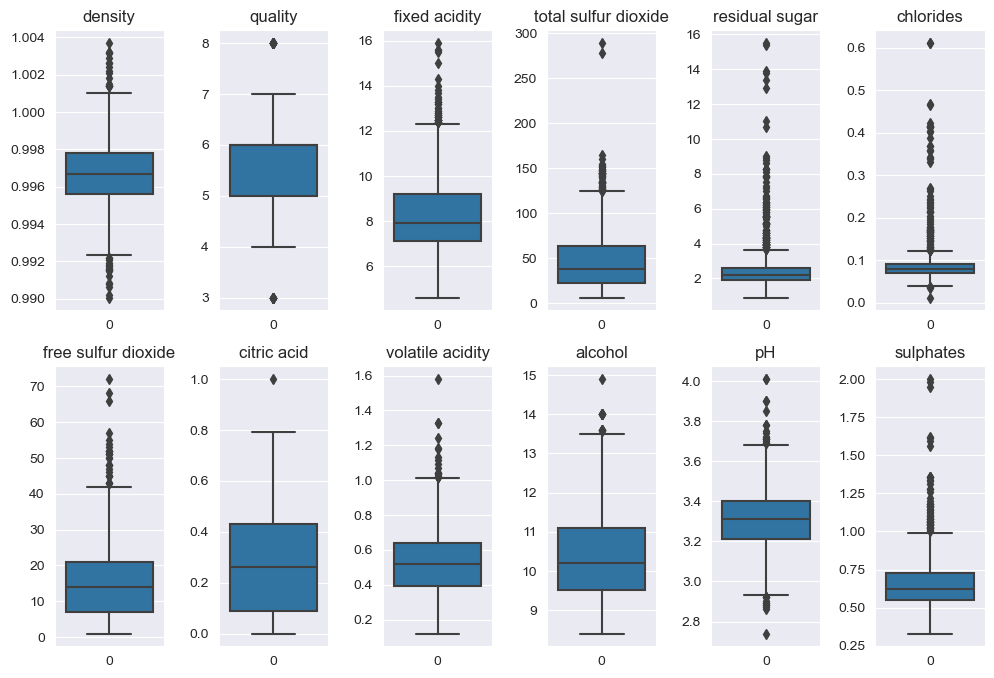

In [11]:
# Mengatur ukuran dan layout subplot
plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.5)  # Menambahkan ruang horizontal antar subplot

# Iterasi melalui setiap kolom dan membuat boxplot di subplot terpisah
for i, name in enumerate(columns, 1):
    plt.subplot(2, len(columns)//2, i)  # 2 baris, sejumlah kolom//2 kolom
    sns.boxplot(data=df[name])
    plt.title(name)  # Menambahkan judul berdasarkan nama kolom

plt.show()

# Processing

In [12]:
from datasist.structdata import detect_outliers

In [13]:
columns_to_check_for_outliers = ['volatile acidity',
                                   'residual sugar',
                                   'chlorides',
                                   'free sulfur dioxide',
                                   'total sulfur dioxide',
                                   'density',
                                   'pH',]

# columns_to_check_for_outliers = ['fixed acidity',
#                                  'volatile acidity',
#                                  'citric acid',
#                                  'residual sugar',
#                                  'chlorides',
#                                  'free sulfur dioxide',
#                                  'total sulfur dioxide',
#                                  'density',
#                                  'pH',
#                                  'sulphates',
#                                  'alcohol',
#                                  'quality']


out_idx = detect_outliers(df, 0, columns_to_check_for_outliers )
len(out_idx)

294

In [14]:
# Loop to drop rows based on outliers
for _ in range(12):  # Adjust the range according to your needs
    # Detect outliers for the current iteration
    out_idx = detect_outliers(df, 0, columns_to_check_for_outliers)
    
    # Check if there are any outliers
    if len(out_idx) > 0:
        # Remove outliers for the current iteration
        df = df.drop(index=out_idx)
    else:
        # If no outliers are found, break out of the loop
        break
df.shape

(932, 12)

In [15]:
def train_test_split(df, test_size):
    
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    
    return train_df, test_df

In [16]:
import numpy as np
import pandas as pd

def smote(X, y, k=5, oversampling_ratio=100):
    """
    Applies SMOTE to balance the dataset.

    Parameters:
    - X: Feature matrix (numpy array, pandas DataFrame, or pandas Series)
    - y: Labels (numpy array, pandas Series, or other iterable)
    - k: Number of nearest neighbors to use for generating synthetic samples
    - oversampling_ratio: Ratio of synthetic samples to generate relative to the number of original samples

    Returns:
    - X_resampled: Resampled feature matrix
    - y_resampled: Resampled labels
    """
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values

    X_resampled = X.copy()
    y_resampled = y.copy()

    minority_class = np.unique(y)[np.argmin(np.bincount(y))]
    minority_indices = np.where(y == minority_class)[0]

    num_minority_samples = len(minority_indices)
    num_synthetic_samples = int(oversampling_ratio * num_minority_samples)

    for i in range(num_synthetic_samples):
        # Choose a random minority sample
        random_minority_index = np.random.choice(minority_indices)
        target_sample = X[random_minority_index]

        # Find k nearest neighbors of the target sample
        distances = np.linalg.norm(X - target_sample, axis=1)
        nearest_neighbors_indices = np.argpartition(distances, k + 1)[:k + 1]
        nearest_neighbors_indices = nearest_neighbors_indices[nearest_neighbors_indices != random_minority_index]

        # Choose one of the nearest neighbors
        nn_index = np.random.choice(nearest_neighbors_indices)
        nn_sample = X[nn_index]

        # Generate a synthetic sample
        alpha = np.random.uniform(0, 1)
        synthetic_sample = target_sample + alpha * (nn_sample - target_sample)

        # Add the synthetic sample to the dataset
        X_resampled = np.vstack([X_resampled, synthetic_sample])
        y_resampled = np.append(y_resampled, minority_class)

    return X_resampled, y_resampled

In [17]:
df = df.drop(["pH",
                "density",
                "total sulfur dioxide",
                "free sulfur dioxide",
                "chlorides",
                "volatile acidity"], axis = 1)

split data

In [18]:
random.seed(190327)
train_df, test_df = train_test_split(df, test_size=0.3)

In [19]:
# X_train = train_df.drop(columns = 'quality')
# y_train = train_df['quality']

# X_test = train_df.drop(columns = 'quality')
# y_test = test_df['quality']

In [20]:
# # Example usage:
# X_train, y_train = smote(X_train, y_train, k=5, oversampling_ratio= 300)
# X_test, y_test = smote(X_test, y_test, k=5, oversampling_ratio= 300)


In [21]:
# print(X_train, y_train)
# print(X_test, y_test)

# Algorithm

In [22]:
class DecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y, depth=0):
        self.X = X
        self.y = y
        self.depth = depth
        self.classes = list(set(y))

        # If all labels are the same or max depth is reached, make a leaf node
        if len(set(y)) == 1 or (self.max_depth and depth == self.max_depth):
            self.label = self.most_common_label(y)
            return

        # Find the best split
        best_split = self.find_best_split(X, y)
        if best_split is None:
            self.label = self.most_common_label(y)
            return

        split_column, split_value = best_split
        self.split_column = split_column
        self.split_value = split_value

        # Split the data
        left_mask = X.iloc[:, split_column] <= split_value
        right_mask = ~left_mask
        self.left = DecisionTreeClassifier(self.max_depth)
        self.right = DecisionTreeClassifier(self.max_depth)

        self.left.fit(X[left_mask], y[left_mask], depth + 1)
        self.right.fit(X[right_mask], y[right_mask], depth + 1)

    def find_best_split(self, X, y):
        best_gini = 1.0
        best_split = None

        for column in range(X.shape[1]):
            values = set(X.iloc[:, column])
            for value in values:
                mask = X.iloc[:, column] <= value
                gini = self.calculate_gini(y, mask)

                if gini < best_gini:
                    best_gini = gini
                    best_split = (column, value)

        return best_split

    def calculate_gini(self, y, mask):
        total_samples = len(y)
        if total_samples == 0:
            return 0

        left_labels = y[mask]
        right_labels = y[~mask]

        left_gini = 1.0 - sum((np.sum(left_labels == c) / len(left_labels)) ** 2 for c in self.classes)
        right_gini = 1.0 - sum((np.sum(right_labels == c) / len(right_labels)) ** 2 for c in self.classes)

        weighted_gini = (len(left_labels) / total_samples) * left_gini + (len(right_labels) / total_samples) * right_gini

        return weighted_gini

    def most_common_label(self, y):
        return max(set(y), key=list(y).count)

    def predict(self, X):
        predictions = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            predictions[i] = self.predict_single(X.iloc[i])
        return predictions

    def predict_single(self, x):
        if hasattr(self, 'label'):
            return self.label

        if x[self.split_column] <= self.split_value:
            return self.left.predict_single(x)
        else:
            return self.right.predict_single(x)



In [23]:
def standard_scaler(X):

    mean_values = np.mean(X, axis=0)
    std_values = np.std(X, axis=0)
    X_scaled = (X - mean_values) / std_values
    return X_scaled

In [58]:
# # Assuming X_train and y_train are your training data
# X_train = standard_scaler(X_train)
# y_train = standard_scaler(y_train)
# X_test = standard_scaler(X_test)
# y_test = standard_scaler(y_test)

# # Assuming X_train and y_train are your training data
X_train = train_df.drop(columns = 'quality')
y_train = train_df['quality']

X_test = test_df.drop(columns = 'quality')
y_test = test_df['quality']

In [25]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

C:\Users\azrul\AppData\Local\Temp\ipykernel_12460\304163975.py:60: RuntimeWarning: invalid value encountered in scalar divide
  right_gini = 1.0 - sum((np.sum(right_labels == c) / len(right_labels)) ** 2 for c in self.classes)


In [26]:
predictions = tree.predict(X_test)  # Uncomment this line when you have test data
predictions_t = tree.predict(X_train)  # Uncomment this line when you have test data

In [27]:
def accuracy_score(y_true, y_pred):
    correct_predictions = 0
    total_samples = len(y_true)

    for true_label, pred_label in zip(y_true, y_pred):
        if true_label == pred_label:
            correct_predictions += 1

    accuracy = correct_predictions / total_samples
    return accuracy

In [28]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
accuracy_t = accuracy_score(y_train, predictions_t)
print(f"Test: {accuracy} \nTrain: {accuracy_t}")


Test: 0.42142857142857143 
Train: 0.6134969325153374


# Decision Tree